In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import skimage.io
from skimage import transform, filters
import glob
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [2]:
#imaging parameters:
delt = 20 #seconds

In [37]:
folder_path = '../../data/maya_diffusion/2023-05-11-_MayaDiffusion_atedge_R2R3_1/pos0/'
files = np.sort(glob.glob(folder_path+'*.tif'))
ims = []
for file in files:
    im = skimage.io.imread(file).astype(np.int16)
    ims.append(im)
ims = np.array(ims)[12:] # start at frame 12
time = np.arange(len(ims))*delt # seconds

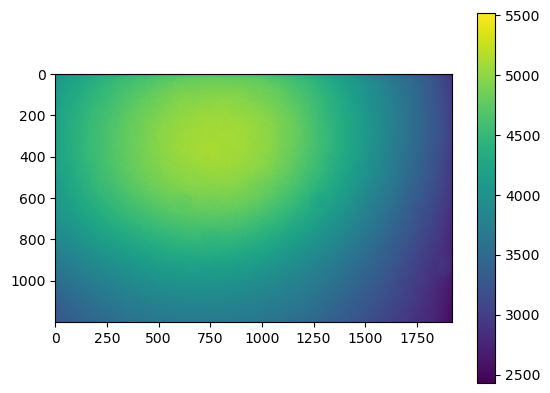

In [38]:
plt.imshow(ims[0])
plt.colorbar()

# Subtract Background

In [39]:
#Subtract background
bg = 1915
bg_im = np.ones(np.shape(ims[0]))*bg
ims_bg = ims-bg

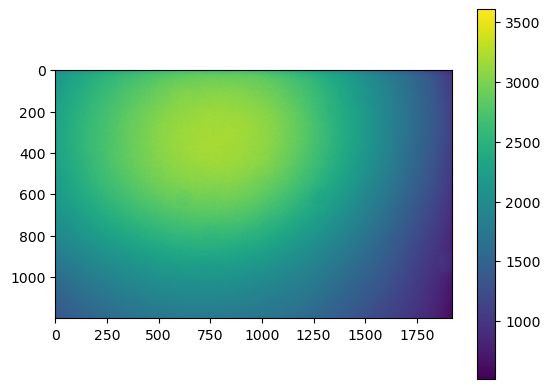

In [40]:
plt.imshow(ims_bg[0])
#plt.plot(np.arange(len(ims[0][0])), np.ones(len(ims[0][0]))*700, color='r')
plt.colorbar()

# Normalize background

Define normalization function

In [41]:
#Create normalization matrix

def norm_mat_fn(im_ref, im_dark, r_blur=3):
    """
    Generate a normalization matrix from a reference image.
    
    This function corrects for uneven illumination. It takes in a reference image which should be the zero 
    ATP control. It then finds the brightest point of the image and for each pixel replaces the pixel value 
    with (brightest pixel value)/(initial pixel value). This creates a matrix that when multiplied by the 
    original image with flatten the illumination and raise every pixel to the brightest value. You can then 
    multiply this normalization matrix by all other images in the dataset to flatten the illumination in each image.

    It is assumed that the reference image is taken for a sample with a spatially uniform protein concentration. The 
    normalization value is everywhere greater than 1, except at the position of the highest illumination.
    
    Parameters
    ----------
    im_ref : numpy array
        Reference image (e.g., the first frame in the MT channel).
    
    offset_camera : float
        Camera offset (not accounting for autofluorescence).
        
    r_blur : float
        Radius of blurring to be performed on the reference image 
        in order to remove noise and short length scale nonuniformities [px].
        
    Returns
    -------
    norm_mat : numpy array
        Normalization matrix
    """
    
    # Convert image into a float type
    im_ref = im_ref.astype(float)
    
    # Subtract the camera offset
    im = im_ref - im_dark
    
    # Rescale the image down for faster denoising
    rescale = 4.0
    im_resized = skimage.transform.rescale(im, 1/rescale)
    
    # Median filter to remove hot pixels
    im_median = skimage.filters.median(im_resized, skimage.morphology.disk(10.0))
    
    # Gaussian blur the image
    im_blur = skimage.filters.gaussian(im_median, r_blur)
    
    # Find the location of the peak
    ind_max = np.where(im_blur == im_blur.max())
    i_center, j_center = ind_max[0][0], ind_max[1][0]
    
    # Peak fluorescence in the normalization image
    fluo_peak = im_blur[i_center, j_center]
    
    # Normalization matrix
    norm_mat = fluo_peak/im_blur 
    
    # Scale up the normalization matrix to the original size
    norm_mat = skimage.transform.rescale(norm_mat, rescale)
    
    return norm_mat


Imprort an image to create a norm matrix - picking one that is far an likely had no atp at the time of imaging

In [42]:
normfile = '../../data/maya_diffusion/2023-05-11-_MayaDiffusion_atedge_R1_1/images/2023-05-11-_MayaDiffusion_atedge_R1_1_MMStack_Pos0.ome0001.tif'
normim = skimage.io.imread(normfile).astype(np.int16) 
darkim = np.ones(np.shape(normim))*bg
normmat = norm_mat_fn(normim, bg_im)
ims_norm = ims_bg*normmat

(4160, 2688.0, 2176.0, 2080)

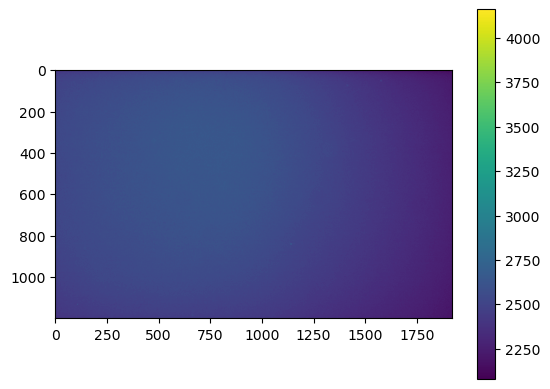

In [52]:
plt.imshow(normim)
plt.colorbar()
np.max(normim), np.percentile(normim,99.9), np.percentile(normim,0.1), np.min(normim)

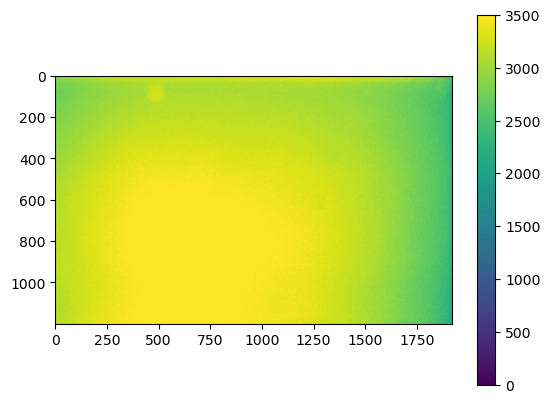

In [43]:
plt.imshow(ims_norm[100], vmin=0, vmax=3500)
plt.colorbar()

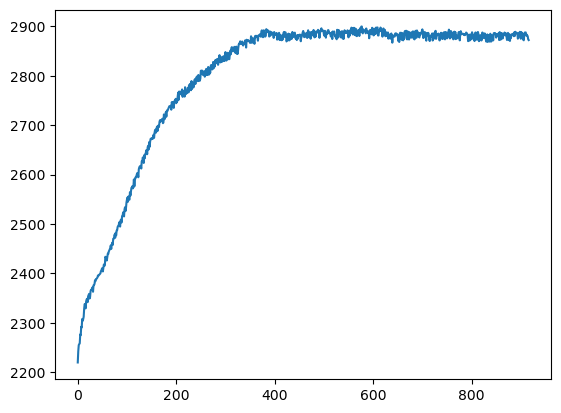

In [55]:
plt.plot(np.arange(len(ims_norm)), np.average(ims_norm[:, 200:-200, 1800:1900], axis=(1,2)))

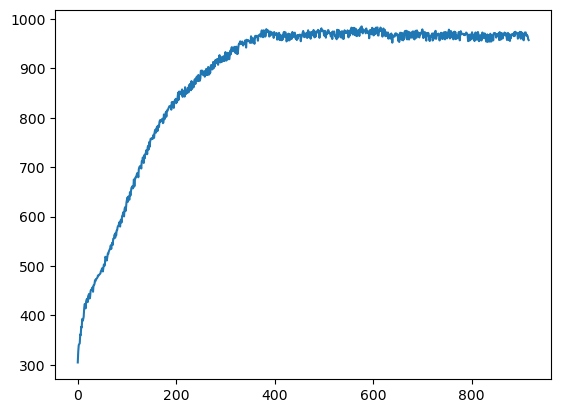

In [54]:
plt.plot(np.arange(len(ims_norm)), np.average(ims_norm[:, 200:-200, 1800:1900], axis=(1,2))-bg)

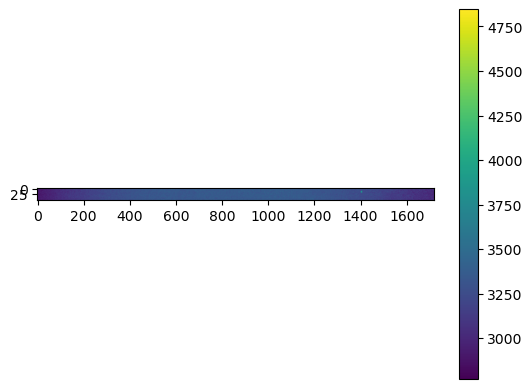

In [29]:
ymin, ymax, xmin, xmax = 750, 800, 100, -100
strip = np.s_[ymin:ymax, xmin:xmax]
plt.imshow(ims_norm[70][strip])
plt.colorbar()

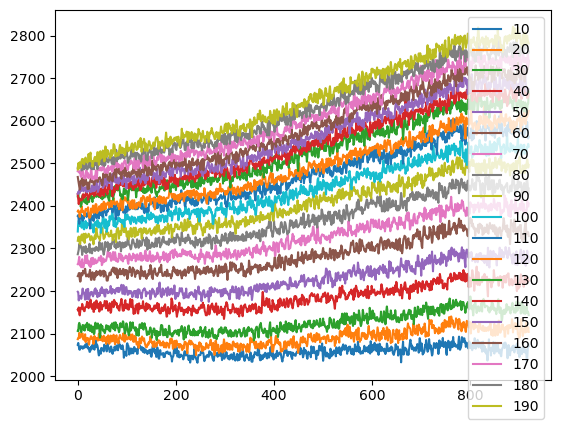

In [259]:
num = len(np.average(ims_norm[10][strip], axis=0))
#plt.plot(np.arange(num), np.average(ims_norm[0][strip], axis=0), label = '0')
plt.plot(np.arange(num), np.average(ims_norm[10][strip], axis=0), label = '10')
plt.plot(np.arange(num), np.average(ims_norm[20][strip], axis=0), label = '20')
plt.plot(np.arange(num), np.average(ims_norm[30][strip], axis=0), label = '30')
plt.plot(np.arange(num), np.average(ims_norm[40][strip], axis=0), label = '40')
plt.plot(np.arange(num), np.average(ims_norm[50][strip], axis=0), label = '50')
plt.plot(np.arange(num), np.average(ims_norm[60][strip], axis=0), label = '60')
plt.plot(np.arange(num), np.average(ims_norm[70][strip], axis=0), label = '70')
plt.plot(np.arange(num), np.average(ims_norm[80][strip], axis=0), label = '80')
plt.plot(np.arange(num), np.average(ims_norm[90][strip], axis=0), label = '90')
plt.plot(np.arange(num), np.average(ims_norm[100][strip], axis=0), label = '100')
plt.plot(np.arange(num), np.average(ims_norm[110][strip], axis=0), label = '110')
plt.plot(np.arange(num), np.average(ims_norm[120][strip], axis=0), label = '120')
plt.plot(np.arange(num), np.average(ims_norm[130][strip], axis=0), label = '130')
plt.plot(np.arange(num), np.average(ims_norm[140][strip], axis=0), label = '140')
plt.plot(np.arange(num), np.average(ims_norm[150][strip], axis=0), label = '150')
plt.plot(np.arange(num), np.average(ims_norm[160][strip], axis=0), label = '160')
plt.plot(np.arange(num), np.average(ims_norm[170][strip], axis=0), label = '170')
plt.plot(np.arange(num), np.average(ims_norm[180][strip], axis=0), label = '180')
plt.plot(np.arange(num), np.average(ims_norm[190][strip], axis=0), label = '190')
plt.legend()

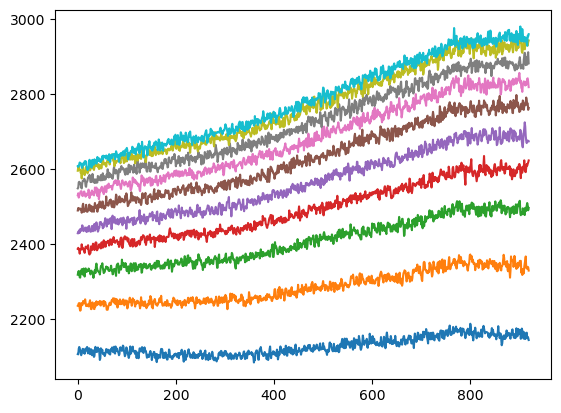

In [270]:
num = len(np.average(ims_norm[10][strip], axis=0))
#plt.plot(np.arange(num), np.average(ims_norm[0][strip], axis=0), label = '0')
plt.plot(np.arange(num), np.average(ims_norm[30][strip], axis=0), label = '10')
plt.plot(np.arange(num), np.average(ims_norm[60][strip], axis=0), label = '20')
plt.plot(np.arange(num), np.average(ims_norm[90][strip], axis=0), label = '30')
plt.plot(np.arange(num), np.average(ims_norm[120][strip], axis=0), label = '40')
plt.plot(np.arange(num), np.average(ims_norm[150][strip], axis=0), label = '50')
plt.plot(np.arange(num), np.average(ims_norm[180][strip], axis=0), label = '60')
plt.plot(np.arange(num), np.average(ims_norm[210][strip], axis=0), label = '70')
plt.plot(np.arange(num), np.average(ims_norm[240][strip], axis=0), label = '80')
plt.plot(np.arange(num), np.average(ims_norm[270][strip], axis=0), label = '90')
plt.plot(np.arange(num), np.average(ims_norm[290][strip], axis=0), label = '100')


In [208]:
np.shape(np.transpose(ims_norm))

(1920, 1200, 293)

Text(0, 0.5, 'inten')

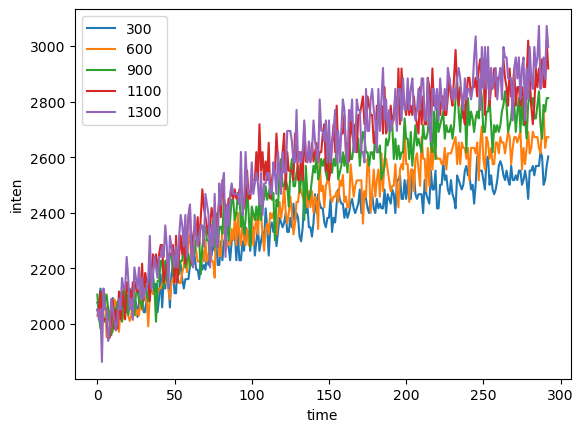

In [273]:
plt.plot(np.arange(len(ims)), np.transpose(ims_norm)[100][700], label='300')
plt.plot(np.arange(len(ims)), np.transpose(ims_norm)[400][700], label='600')
plt.plot(np.arange(len(ims)), np.transpose(ims_norm)[700][700], label='900')
plt.plot(np.arange(len(ims)), np.transpose(ims_norm)[1000][700], label='1100')
plt.plot(np.arange(len(ims)), np.transpose(ims_norm)[1100][700], label='1300')
plt.legend()
plt.xlabel('time')
plt.ylabel('inten')

In [ ]:
for im in ims_norm:
    prof = im[]

# simulate

1) We are going to simulate what we predict to occur in our experiment. First set up parameters. You will need:

    x-step interval: delx=1

    time step interval: delt = 20 #seconds

    the frequency of jumping, start with: k=1/(10*delt)

    the number of timesteps: Nt = 300

    The number of x positions: Nx = 1920 #length of the image in pixels

    And the initial concentration of ATP: c0 = 500 #uM 

    Define all these variables
    
2) Create an array of zeros (call it pos) with the shape (Nt, Nx) we will record the amount of ATP in this matrix for every time and position. 
3) Set the concentration on the left "box" to be c0 at time = 0. So pos[0][0]=c0
4) Create a for loop over each time point and inside this loop another for loop over position. Here program the equation we have been talking about (the jumping particles to boxes model). Remember that the first and last box need a different equation, use an if statement for these cases. I recommend writing out again the formulas for the generic situation and the end cases on paper first and then think about how you would write it in python.
5) Try plotting for several times what the profile of ATP will look like. (remember time is the first index of pos and the actual positions are the second index. Plot position vs intensity.

In [60]:
delx = 100 #pixels
delt = 20 #seconds
k = 1/(10*delt) #what we wanna know where 0<k<1/delt
Nt = 200 #293 timesteps
xpos = 2000
Nx = int(4000/delx) #length of image in pixels
c0 = 1410 #pmol

pos = np.zeros((Nt,Nx))
pos[0][0] = c0
for t in range(Nt-1):
    for x in range(Nx):
        if x == 0:
            pos[t+1][x] = pos[t][x] - k*delt*pos[t][x] + k*delt*pos[t][x+1]
        elif x == Nx-1:
            pos[t+1][x] = pos[t][x] - k*delt*pos[t][x] + k*delt*pos[t][x-1]
        else:
            pos[t+1][x] = pos[t][x] - 2*k*delt*pos[t][x] + k*delt*pos[t][x+1] + k*delt*pos[t][x-1]

In [61]:
def sim(delt, k, Nt, Nx, c0):
    pos = np.zeros((Nt,Nx))
    pos[0][0] = c0
    for t in range(Nt-1):
        for x in range(Nx):
            if x == 0:
                pos[t+1][x] = pos[t][x] - k*delt*pos[t][x] + k*delt*pos[t][x+1]
            elif x == Nx-1:
                pos[t+1][x] = pos[t][x] - k*delt*pos[t][x] + k*delt*pos[t][x-1]
            else:
                pos[t+1][x] = pos[t][x] - 2*k*delt*pos[t][x] + k*delt*pos[t][x+1] + k*delt*pos[t][x-1]
    return pos

In [89]:
ktestvals = np.array([0.09, 0.092, 0.1, 0.12, 0.13, 0.135, 0.14, 0.15])/delt

sims = []
for k in ktestvals:
    sims.append(sim(delt, k, Nt, Nx, c0))
sims=np.array(sims)

In [90]:
np.shape(sims)

(8, 200, 40)

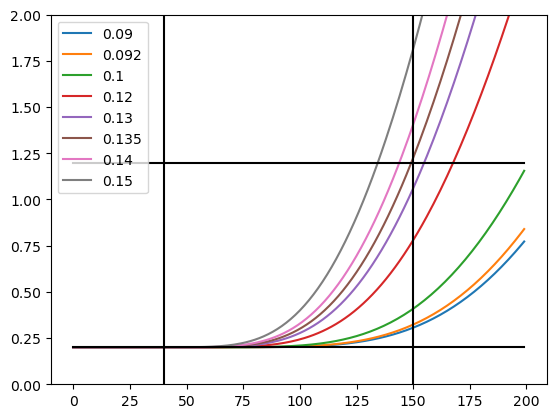

In [91]:
for i, simu in enumerate(sims):
    plt.plot(np.arange(Nt), simu[:, int(Nx/2)]+ 0.2, label = ktestvals[i]*delt)
plt.plot(np.arange(Nt), np.ones(Nt)*0.2, color = 'k')
plt.plot(np.arange(Nt), np.ones(Nt)*1.2, color='k')
plt.plot([150, 150], [0, 2], color='k')
plt.plot([40, 40], [0, 2], color='k')
plt.ylim(0,2)
plt.legend()

Text(0, 0.5, 'Intensity')

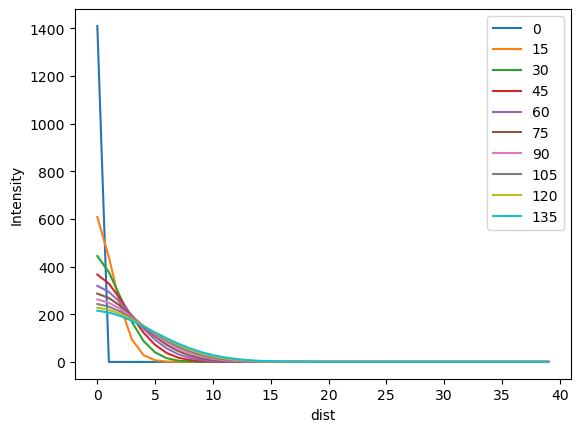

In [24]:
plt.plot(np.arange(len(pos[0])), pos[0], label='0')
plt.plot(np.arange(len(pos[0])), pos[int(Nt/10)], label=str(int(Nt/10)))
plt.plot(np.arange(len(pos[0])), pos[2*int(Nt/10)], label=str(2*int(Nt/10)))
plt.plot(np.arange(len(pos[0])), pos[3*int(Nt/10)], label=str(3*int(Nt/10)))
plt.plot(np.arange(len(pos[0])), pos[4*int(Nt/10)], label=str(4*int(Nt/10)))
plt.plot(np.arange(len(pos[0])), pos[5*int(Nt/10)], label=str(5*int(Nt/10)))
plt.plot(np.arange(len(pos[0])), pos[6*int(Nt/10)], label=str(6*int(Nt/10)))
plt.plot(np.arange(len(pos[0])), pos[7*int(Nt/10)], label=str(7*int(Nt/10)))
plt.plot(np.arange(len(pos[0])), pos[8*int(Nt/10)], label=str(8*int(Nt/10)))
plt.plot(np.arange(len(pos[0])), pos[9*int(Nt/10)], label=str(9*int(Nt/10)))
#plt.ylim(0,1000)
#plt.xlim(0, 20)
plt.legend()
plt.xlabel('dist')
plt.ylabel('Intensity')

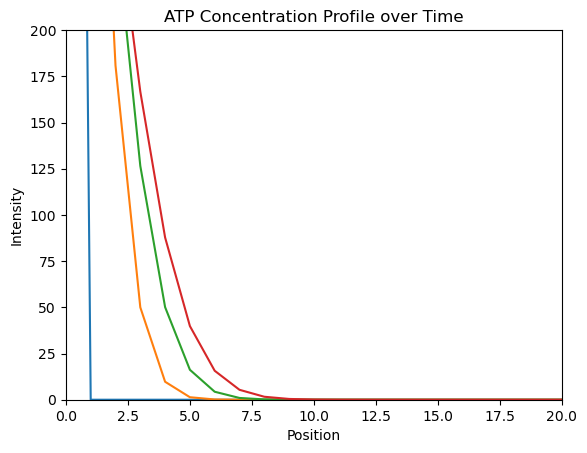

In [8]:
time_s = [0, 10, 20, 30]
for t in time_s: 
    plt.plot(range(Nx), pos[t], label= "Time Step (t)")

plt.xlabel("Position")
plt.ylabel("Intensity")
plt.xlim(0, 20)
plt.ylim(0,200)
plt.title("ATP Concentration Profile over Time")
plt.show()

Text(0, 0.5, 'Intensity')

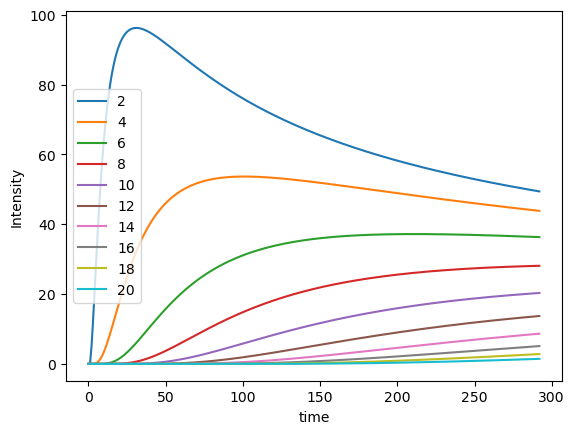

In [158]:
plt.plot(np.arange(len(pos)), np.transpose(pos)[2], label='2')
plt.plot(np.arange(len(pos)), np.transpose(pos)[4], label='4')
plt.plot(np.arange(len(pos)), np.transpose(pos)[6], label='6')
plt.plot(np.arange(len(pos)), np.transpose(pos)[8], label='8')
plt.plot(np.arange(len(pos)), np.transpose(pos)[10], label='10')
plt.plot(np.arange(len(pos)), np.transpose(pos)[12], label='12')
plt.plot(np.arange(len(pos)), np.transpose(pos)[14], label='14')
plt.plot(np.arange(len(pos)), np.transpose(pos)[16], label='16')
plt.plot(np.arange(len(pos)), np.transpose(pos)[18], label='18')
plt.plot(np.arange(len(pos)), np.transpose(pos)[20], label='20')
#plt.ylim(0,200)
#plt.xlim(0, 20)
plt.legend()
plt.xlabel('time')
plt.ylabel('Intensity')

In [156]:
np.shape(np.transpose(pos))

(1920, 293)